# 실습

상환 여부를 예측하기 위한 의사결정나무 분석을 실시하고 결과를 해석하라.

분석 절차: 
* [데이터 구성하기](#데이터-구성하기)
* [의사결정나무 모델 생성](#의사결정나무-모델-생성)
* [최종 모델 선정, 시각화](#최종-모델-선정,-시각화)
* [결론 도출](#결론-도출)


[Help](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)


In [34]:
# conda install python-graphviz

#### 공통 패키지 불러오기

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

In [36]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "NanumGOTHIC")

In [37]:
import os
# graphviz path 설정
# os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

####  의사결정나무 모델 패키지 불러오기

In [38]:
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

# 만약 그래프비즈가 안되면...
from sklearn.tree import plot_tree

## 데이터 구성하기

#### 데이터 불러오기

In [39]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/통신고객이탈.csv', encoding='euc-kr')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 결측치 확인

In [40]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

#### 더미변수 생성

In [41]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


#### 변수 역할 지정

In [42]:
df_raw_y = df_raw["CHURN"] 
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "Active", 0, 1)

In [43]:
df_x_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


#### train, test 데이터 분할

In [44]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


## 의사결정나무 모델 생성

#### default parameter로 모델 생성

In [45]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.853


In [46]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

#### max_depth: 최대 깊이 변경에 따른 정확도 변화

In [47]:
para_depth = [depth for depth in range(1, 11)]
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.839,0.860
1,2,0.866,0.889
2,3,0.889,0.910
3,4,0.892,0.910
4,5,0.920,0.903
5,6,0.931,0.875
6,7,0.951,0.860
7,8,0.959,0.842
8,9,0.963,0.853
9,10,0.972,0.857


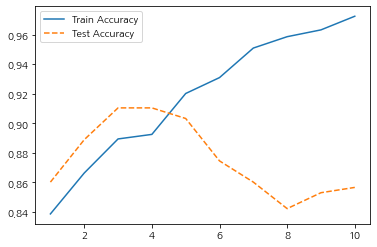

In [49]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### 깊이(max_depth)에 따른 차이 변화(깊이 4 vs 6)

max_depth = 4

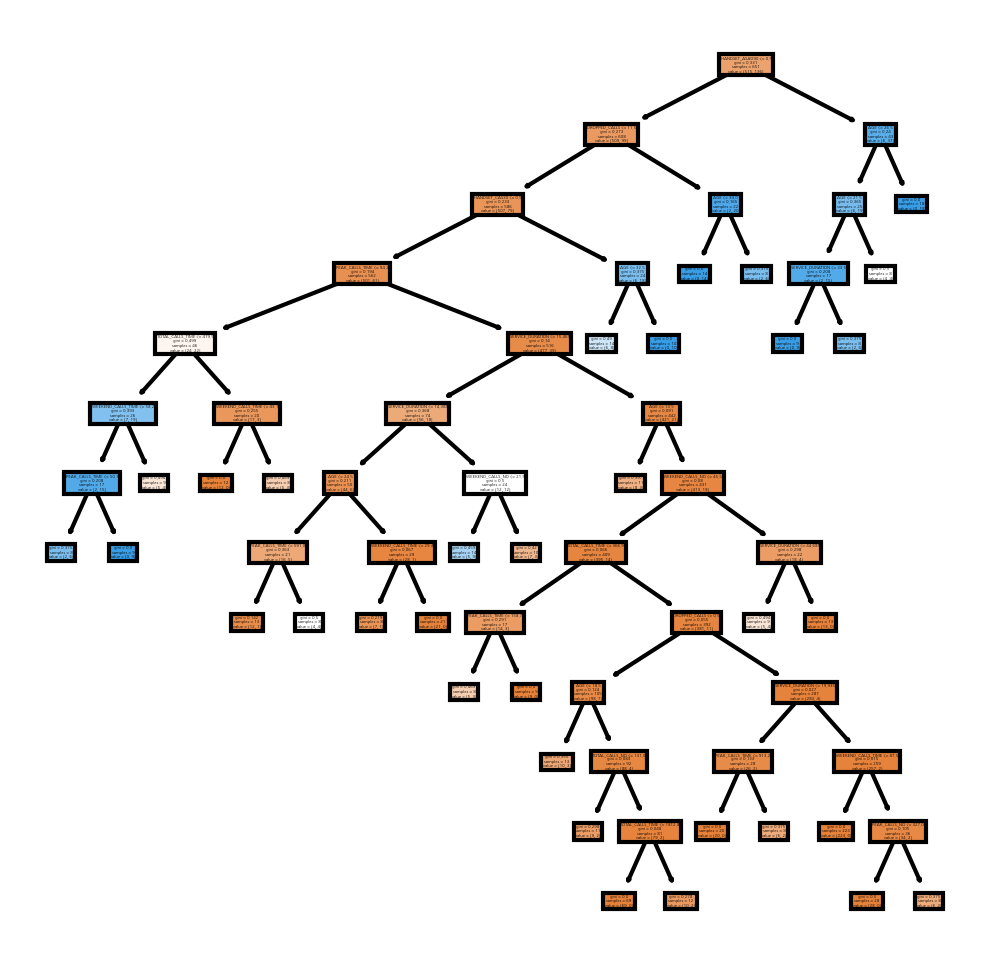

In [50]:
v_feature_name = df_train_x.columns

# 노드의 최소 자료 수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

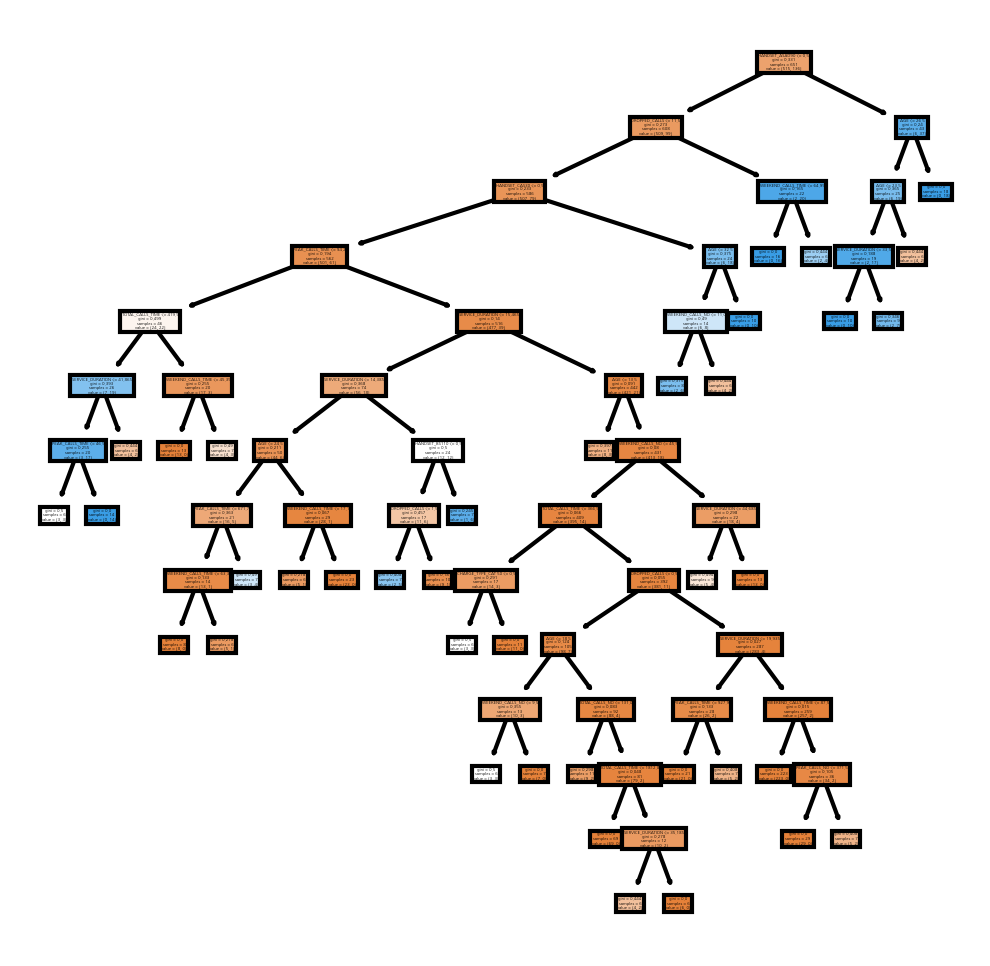

In [51]:
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 6 모델
tree_graph = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 6)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi = 300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);


max_depth = 6

In [52]:
# 깊이가 6인 모델
# tree_depth6 = DecisionTreeClassifier(max_depth = 6, random_state=1234)
# tree_depth6.fit(df_train_x, df_train_y)

# export_graphviz(tree_depth6, out_file="tree.dot2", class_names = ["Active", "Churned"],
#                 feature_names = feature_names, impurity = True, filled = True)

# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

#### min_samples_leaf: 잎사귀 노드의 샘플 수 제한

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.885,0.914
1,20,0.885,0.914
2,30,0.848,0.871
3,40,0.848,0.871
4,50,0.794,0.821
5,60,0.791,0.842
6,70,0.791,0.842
7,80,0.791,0.842
8,90,0.791,0.842
9,100,0.791,0.842


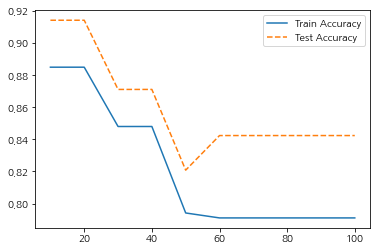

In [54]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### 잎사귀 노드의 샘플 수(min_samples_leaf)를 변경하면서 모델의 시각화 결과를 확인

min_samples_leaf = 20

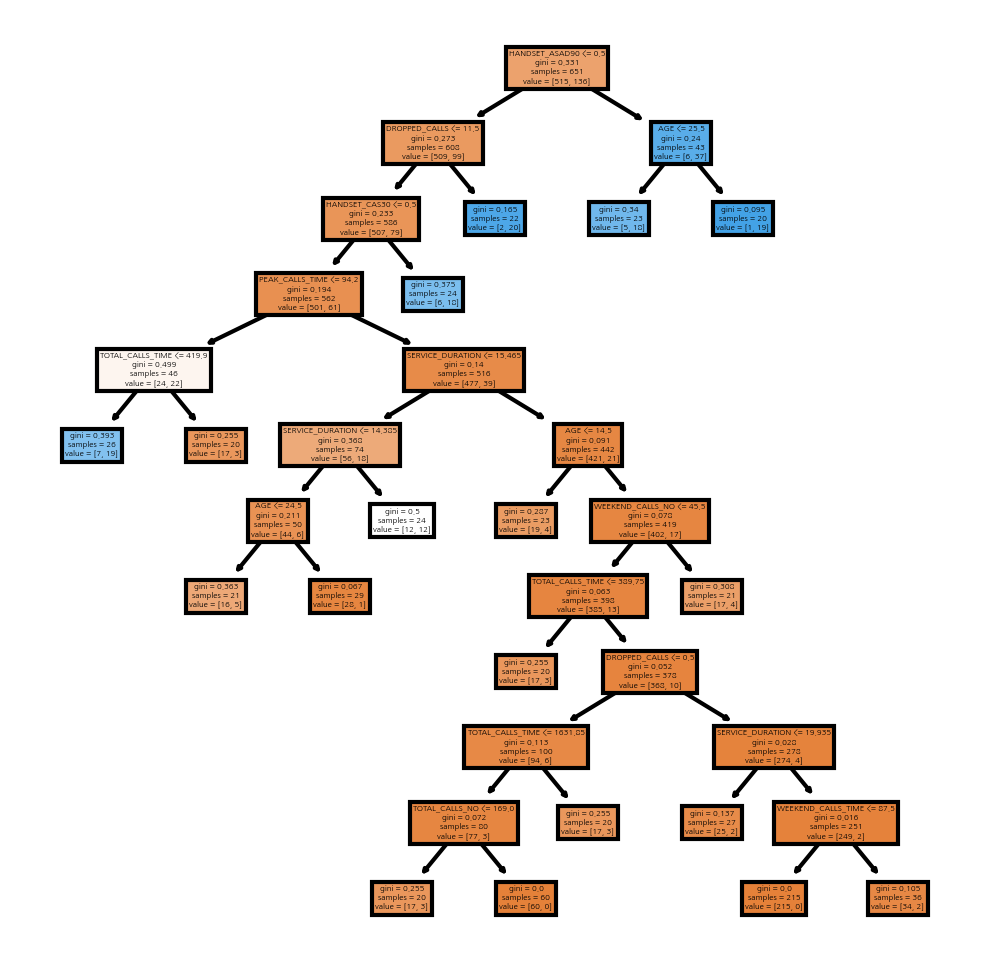

In [55]:
# 잎사귀 노드의 샘플 수가 20인 모델
# tree_leaf20 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20, random_state = 1234)
# tree_leaf20.fit(df_train_x, df_train_y)

# export_graphviz(tree_leaf20, out_file="tree.dot3", class_names = ["Active", "Churned"],
#                 feature_names = feature_names, impurity = True, filled = True)

# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 20 모델
tree_graph = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 20)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi = 300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

min_samples_leaf = 60

In [56]:
# 잎사귀 노드의 샘플 수가 60인 모델
# tree_leaf60 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 60, random_state=1234)
# tree_leaf60.fit(df_train_x, df_train_y)

# export_graphviz(tree_leaf60, out_file="tree.dot4", class_names = ["Active", "Churned"],
#                 feature_names = feature_names, impurity = True, filled = True)

# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

#### min_samples_split: 분할하기 위한 노드의 최소 샘플 수

In [57]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 20 for n_split in range(1, 11)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 20, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.885,0.914
1,40,0.885,0.914
2,60,0.885,0.914
3,80,0.885,0.914
4,100,0.885,0.914
5,120,0.885,0.914
6,140,0.885,0.914
7,160,0.885,0.914
8,180,0.885,0.914
9,200,0.885,0.914


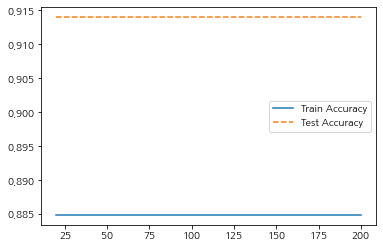

In [58]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

## 최종 모델 선정, 시각화

#### 최종 모델

In [59]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [60]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.914

Confusion matrix: 
[[228   7]
 [ 17  27]]


In [61]:
# tree_final.dot으로 결과 저장
# export_graphviz(tree_final, out_file="tree_fianl.dot", class_names = ["Active", "Churned"],
#                 feature_names = feature_names, impurity = True, filled = True)

# tree_final.dot 그리기
# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [62]:
v_feature_name

Index(['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M',
       'CHARGE_TYPE_CAT 100', 'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50',
       'CHARGE_TYPE_Play 100', 'CHARGE_TYPE_Play 300', 'HANDSET_ASAD170',
       'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30',
       'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10',
       'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low',
       'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow',
       'USAGE_BAND_None'],
      dtype='object')

## 결론 도출

In [63]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.400
2,DROPPED_CALLS,0.260
20,HANDSET_CAS30,0.194
4,PEAK_CALLS_TIME,0.140
8,TOTAL_CALLS_TIME,0.006
25,HANDSET_SOP20,0.000
21,HANDSET_CAS60,0.000
22,HANDSET_S50,0.000
23,HANDSET_S80,0.000
24,HANDSET_SOP10,0.000


Text(0, 0.5, '설명변수')

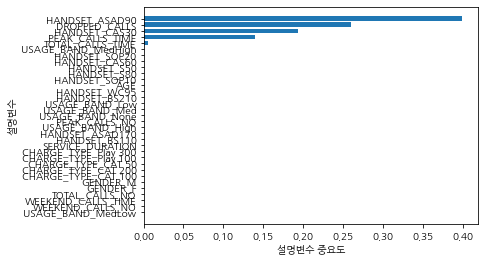

In [64]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")


#### GridSearchCV를 이용한 최적 parameter 찾기

In [65]:
estimator = DecisionTreeClassifier(random_state = 1234)
param_grid = {"max_depth": para_depth,
              "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=1234)

best parameter: 
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score: 
0.897


In [66]:
param_grid

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}